<a href="https://colab.research.google.com/github/RahulTechTutorials/Deep_learning/blob/master/Boston_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Importing all the libraries, Keras, Matplotlib, Numpy 
import keras
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
from keras import models,layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data,train_target),(test_data,test_target) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape,train_target.shape,test_data.shape,test_target.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [0]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [0]:
train_data -= mean
train_data /= std

In [0]:
test_data -= mean
test_data /= std

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss = 'mse', metrics = ['mae'])
  return model

In [9]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
## Cross validation
k = 4
num_val_samples = len(train_data)//k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('Processing fold #', i)
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_target = train_target[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[: i * num_val_samples],train_data[(i+1) * num_val_samples : ] ],axis = 0)
  partial_train_target = np.concatenate([train_target[: i * num_val_samples],train_target[(i+1) * num_val_samples : ] ],axis = 0)
  model = build_model()
  history = model.fit(partial_train_data,partial_train_target,validation_data = (val_data,val_target) ,epochs = num_epochs, batch_size =1,verbose = 0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)
  
  
  

Processing fold # 0
Instructions for updating:
Use tf.cast instead.
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [14]:
len(all_mae_histories[0])
len(average_mae_history)

500

In [0]:
average_mae_history = [ np.mean( [x[i] for x in all_mae_histories] )  for i in range(num_epochs)]

##average_mae_history = []
##history.history.keys()

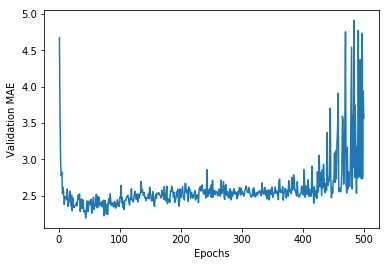

In [15]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


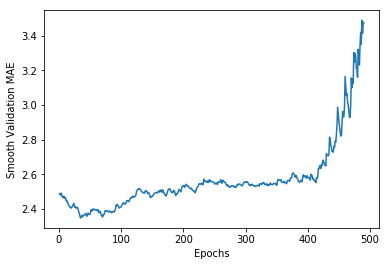

In [17]:
def smooth_curve(points,factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else : 
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Smooth Validation MAE')
plt.show()


We see that at around 90 epoches the validation MAE starts getting higher. So we do a final run with 90 epochs


In [31]:
model = build_model()
model.fit(train_data,train_target, epochs= 80, batch_size = 60,verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

102/102 [==============================] - 0s 1ms/step


In [32]:
test_mae_score

2.775113722857307